# K-Nearest Neighbours Tutorial
* Let’s take a look at how we could go about classifying data using the K-Nearest Neighbors algorithm in Python.
* For this tutorial, we’ll be using the breast cancer dataset from the sklearn.datasets module. 
* We need to start by importing the proceeding libraries.

In [23]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
from math import sqrt

* The dataset classifies tumors into two categories (malignant and benign) and contains something like 30 features. 
* In the real world, you’d look at the correlations and select a subset of features that plays the greatest role in determining whether a tumor is malignant or not.
* We must encode categorical data for it to be interpreted by the model (i.e. malignant = 0 and benign = 1).

In [7]:
breast_cancer = load_breast_cancer()
X = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
#X = X[['mean area', 'mean compactness']]
y = pd.Categorical.from_codes(breast_cancer.target, breast_cancer.target_names)
y = pd.get_dummies(y, drop_first=True)

* The point of building a model, is to classify new data with undefined labels. 
* Therefore, we need to put aside data to verify whether our model does a good job at classifying the data. 
* We have set aside 20% of the samples in the original dataset for testing.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=1)

In [49]:
# calculate the Euclidean distance between two vectors
def euclidean_distance(row1, row2):
	distance = 0.0
	for i in range(len(row1)):
		distance += (row1[i] - row2[i])**2
	return sqrt(distance)

In [58]:
# Locate the most similar neighbors
def get_neighbors(train, test_row, num_neighbors):
	distances = list()
	for count,train_row in enumerate(train.values):
		dist = euclidean_distance(test_row, train_row)
		distances.append((count, dist))
	distances.sort(key=lambda tup: tup[1])
	neighbors = list()
	for i in range(num_neighbors):
		neighbors.append(distances[i][0])
	return neighbors

In [71]:
# Make a classification prediction with neighbors
def predict_classification(train,y_train,test_row, num_neighbors):
	neighbors = get_neighbors(train, test_row, num_neighbors)
	output_values = list([y_train.iloc[i].values[0] for i in neighbors])
	prediction = max(set(output_values), key=output_values.count)
	return prediction

In [72]:
y_pred=[predict_classification(X_train,y_train,X_test.iloc[i],5) for i in range(X_test.shape[0])]

In [73]:
result=accuracy_score(y_test, y_pred)
print("Our model has an accuracy of {}%".format(result*100))

Given our confusion matrix, our model has an accuracy of 93.85964912280701%


* The Sklearn library provides a built in implementation of K-Nearest Neighbours. 
* Therefore, in order to make use of the KNN algorithm, it’s sufficient to create an instance of KNeighborsClassifier.
* By default, the KNeighborsClassifier looks for the 5 nearest neighbors. We must explicitly tell the classifier to use Euclidean distance for determining the proximity between neighboring points.

In [9]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train.values.ravel())

KNeighborsClassifier(metric='euclidean')

* Using our newly trained model, we predict whether a tumor is benign or malignant.

In [10]:
y_pred = knn.predict(X_test)

We visually compare the predictions made by our model with the samples inside the testing set.

Text(0.5, 1.0, 'Actual Data')

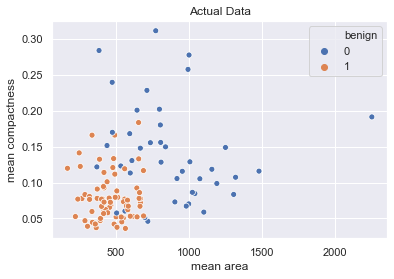

In [11]:
sns.scatterplot(
    x='mean area',
    y='mean compactness',
    hue='benign',
    data=X_test.join(y_test, how='outer')
)
plt.title('Actual Data')

Text(0.5, 1.0, 'Predictions of our model')

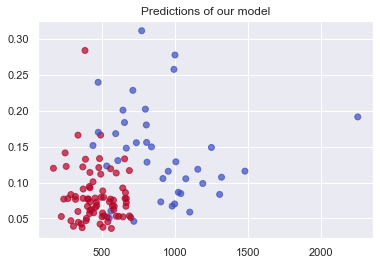

In [12]:
plt.scatter(
    X_test['mean area'],
    X_test['mean compactness'],
    c=y_pred,
    cmap='coolwarm',
    alpha=0.7
)
plt.title("Predictions of our model")

* Another way of evaluating our model is to compute the confusion matrix. 
* The numbers on the diagonal of the confusion matrix correspond to correct predictions whereas the others imply false positives and false negatives.

In [13]:
confusion_matrix(y_test, y_pred)

array([[37,  5],
       [ 2, 70]])

In [21]:
result=accuracy_score(y_test, y_pred)
print("Given our confusion matrix, our model has an accuracy of {}%".format(result*100))

Given our confusion matrix, our model has an accuracy of 93.85964912280701%


# Conclusion

* The K-Nearest Neighbors algorithm doesn’t require any additional training when new data becomes available. 
* The accuracy score for the model implemented by us and the model implemented by sklearn is the same.
* Rather it determines the K closest points according to some distance metric (the samples must reside in memory).
* Then, it looks at the target label for each of the neighbors and places the new found data point into the same category as the majority. 
* Given that KNN computes distance, it’s imperative that we scale our data. 
* In addition, since KNN disregards the underlying features, it’s our responsibility to filter out any features that are deemed irrelevant.